<a href="https://colab.research.google.com/github/doruksahin/ETUmulator/blob/master/rfc_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [61]:
data_labels=pd.read_csv('/content/sample_data/train.csv')
data_values=pd.read_csv('/content/sample_data/labels.csv')
data = data_values.merge(data_labels, on='id')

##status_group-functional,non-functional or needs repair

amount_tsh – Total static head (amount water available to waterpoint)

date_recorded – The date the row was entered

funder – Who funded the well

gps_height – Altitude of the well

installer – Organization that installed the well

longitude – GPS coordinate

latitude – GPS coordinate

wpt_name – Name of the waterpoint if there is one

num_private -No description

basin – Geographic water basin

subvillage – Geographic location

region – Geographic location

region_code – Geographic location (coded)

district_code – Geographic location (coded)

lga – Geographic location

ward – Geographic location

population – Population around the well

public_meeting – True/False

recorded_by – Group entering this row of data

scheme_management – Who operates the water point

scheme_name – Who operates the water point

permit – If the water point is permitted

construction_year – Year the water point was constructed

extraction_type – The kind of extraction the water point uses

extraction_type_group – The kind of extraction the water point uses

extraction_type_class – The kind of extraction the water point uses

management – How the water point is managed

management_group – How the water point is managed

payment – What the water costs

payment_type – What the water costs

water_quality – The quality of the water

quality_group – The quality of the water

quantity – The quantity of water

quantity_group – The quantity of water

source – The source of the water

source_type – The source of the water

source_class – The source of the water

waterpoint_type – The kind of waterpoint

waterpoint_type_group – The kind of waterpoint

In [62]:
data.isnull().sum()
data.population.min()
data['gps_height'].replace(0.0, np.nan, inplace=True)
data['population'].replace(0.0, np.nan, inplace=True)
data['amount_tsh'].replace(0.0, np.nan, inplace=True)
data.isnull().sum()

id                           0
status_group                 0
amount_tsh               41639
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [63]:
data.groupby(['region','permit']).size() 

region         permit
Arusha         False      255
               True      2650
Dar es Salaam  False      777
Dodoma         False     1212
               True       989
Iringa         False     2117
               True      3174
Kagera         False      795
               True      2521
Kigoma         False     1160
               True      1656
Kilimanjaro    False      445
               True      3796
Lindi          False      733
               True       813
Manyara        False       77
               True      1506
Mara           False      604
               True       998
Mbeya          False     1399
               True      2134
Morogoro       False       39
               True      3967
Mtwara         False      419
               True      1311
Mwanza         False      127
               True      2975
Pwani          False     1105
               True      1530
Rukwa          False      646
               True      1162
Ruvuma         False      840
               Tru

In [64]:
data["gps_height"].fillna(data.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data["gps_height"].mean(), inplace=True)
data["population"].fillna(data.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
data["population"].fillna(data.groupby(['region'])["population"].transform("median"), inplace=True)
data["population"].fillna(data["population"].median(), inplace=True)
data["amount_tsh"].fillna(data.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
data["amount_tsh"].fillna(data.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
data["amount_tsh"].fillna(data["amount_tsh"].median(), inplace=True)
data.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [65]:
print(data.latitude.max()-data.latitude.min())
print(data.longitude.max()-data.longitude.min())

11.64944016
40.34519307


In [66]:
features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
data[features] = scaler.fit_transform(data[features])
data[features].head(20)
data.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

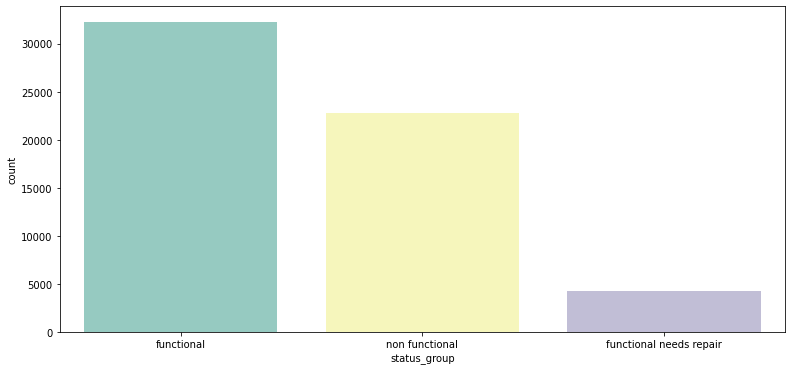

In [67]:
plt.figure(figsize=(13,6))
sns.countplot(data.status_group, palette = 'Set3')
data.status_group.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

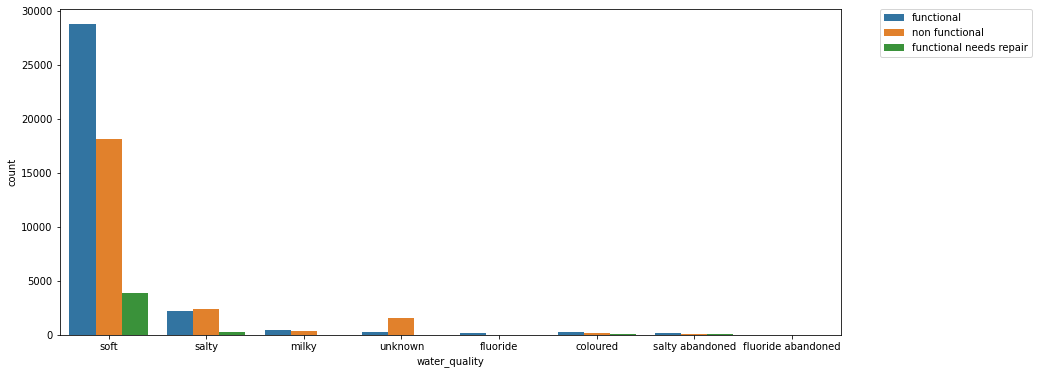

In [68]:
plt.figure(figsize=(14,6))
sns.countplot(data=data,x='water_quality',hue='status_group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
data.water_quality.value_counts()

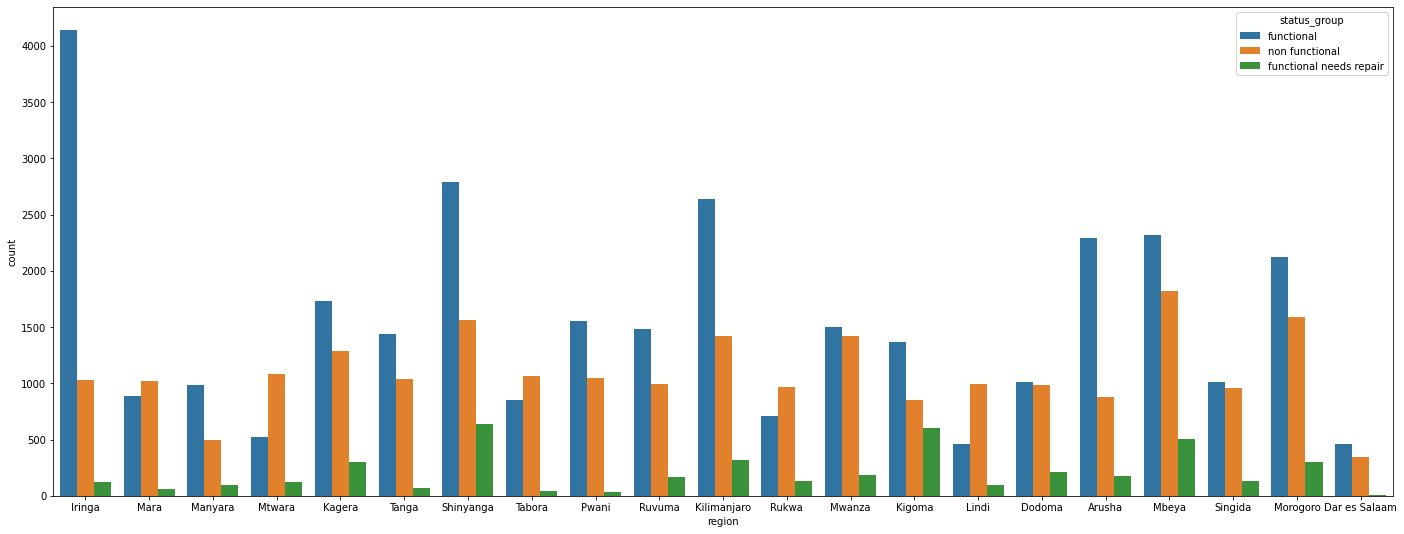

In [69]:
#looking at regions
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='region',hue='status_group')

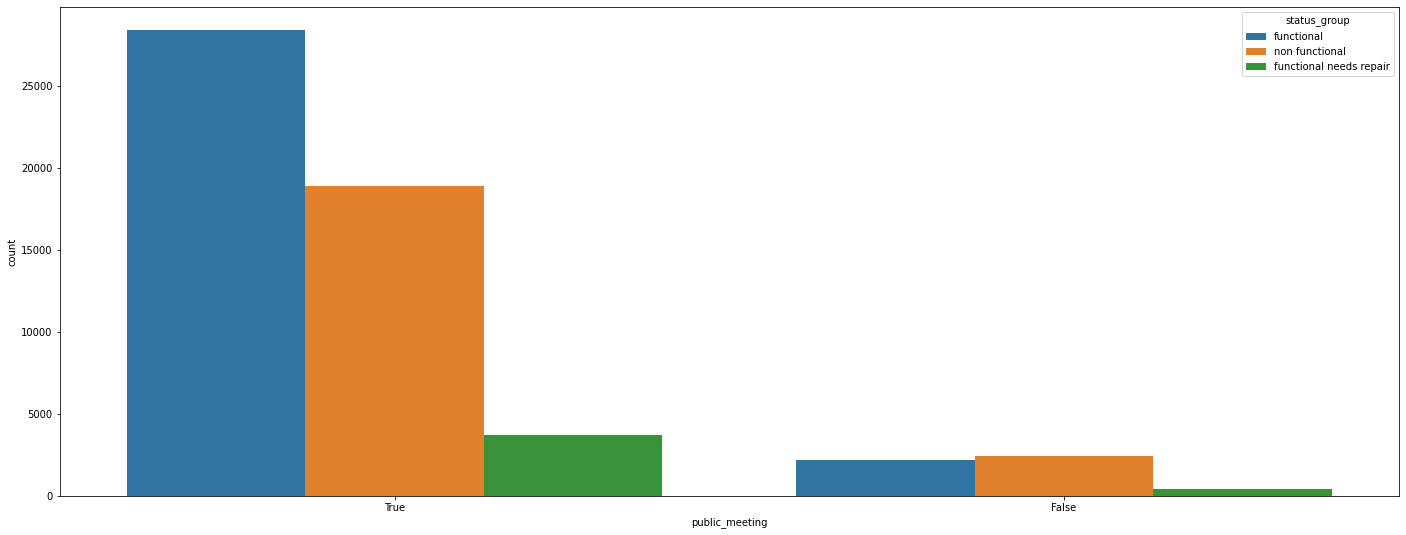

In [70]:
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='public_meeting',hue='status_group')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


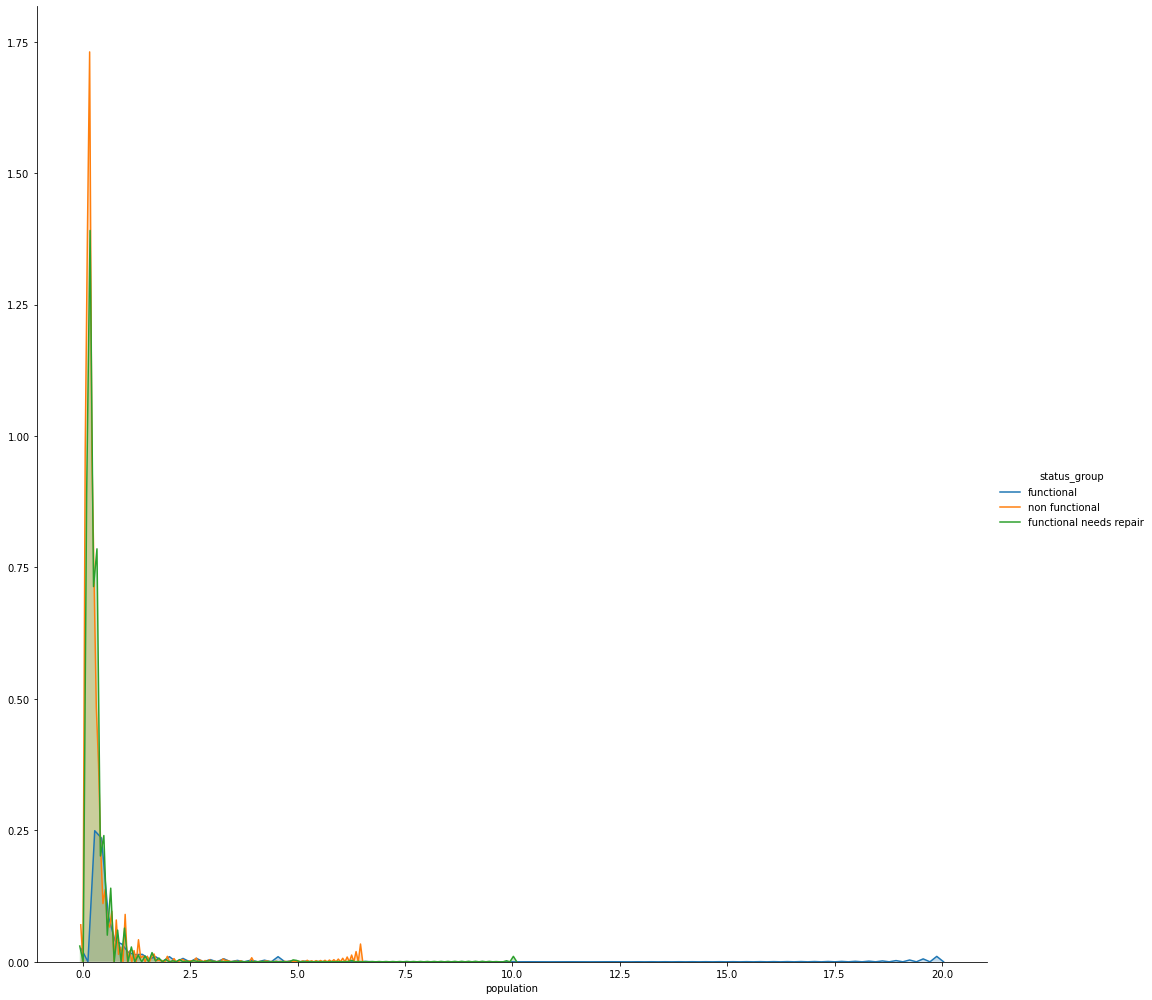

In [71]:
(sns
  .FacetGrid(data, 
             hue='status_group',size=14)
  .map(sns.kdeplot, 'population', shade=True)
 .add_legend()
)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


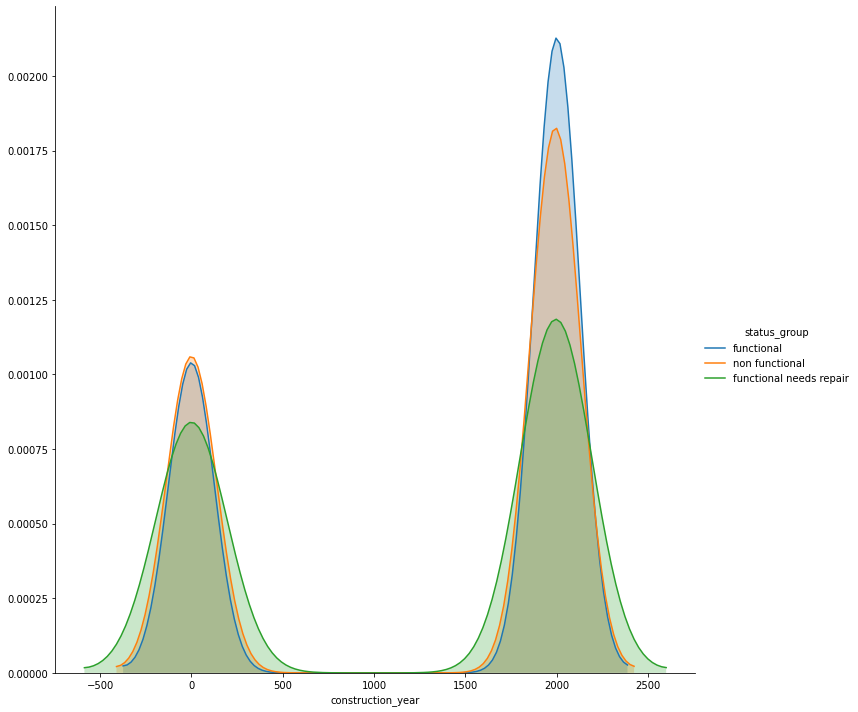

In [72]:
(sns
  .FacetGrid(data, 
             hue='status_group',size=10)
  .map(sns.kdeplot, 'construction_year', shade=True)
 .add_legend()
)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


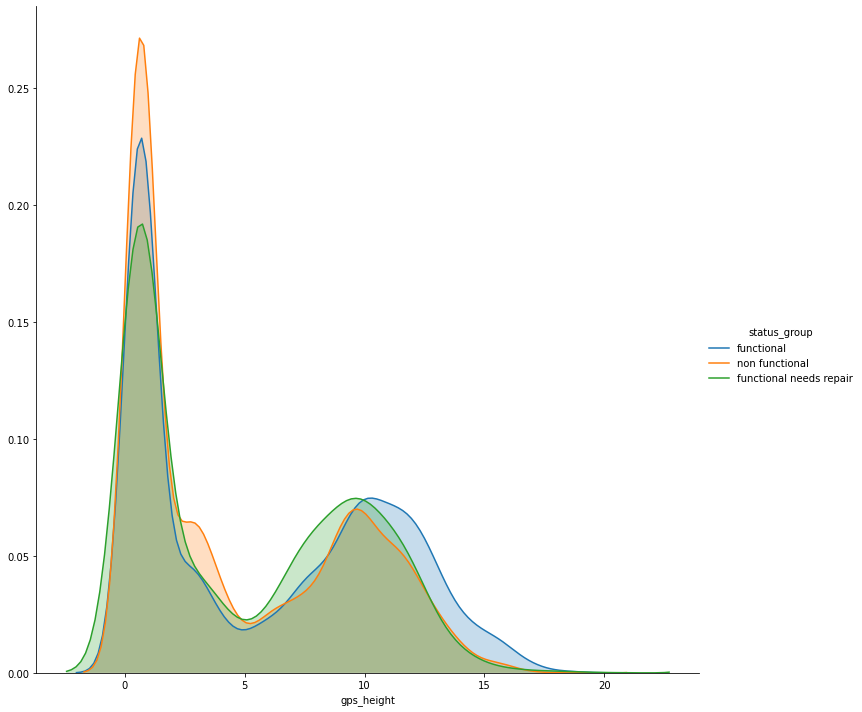

In [73]:
(sns
  .FacetGrid(data, 
             hue='status_group',size=10)
  .map(sns.kdeplot, 'gps_height', shade=True)
 .add_legend()
)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


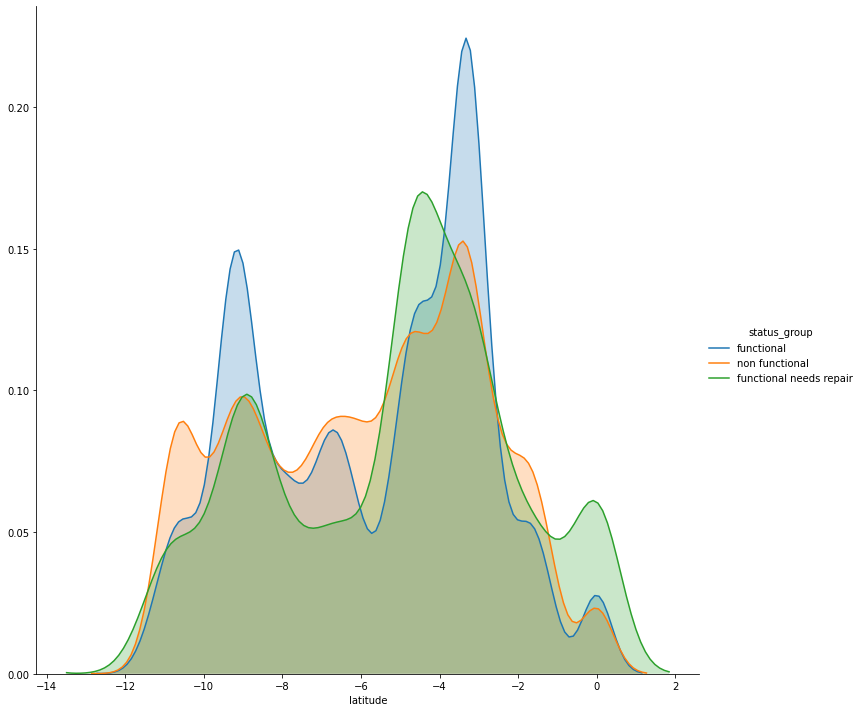

In [74]:
(sns
  .FacetGrid(data, 
             hue='status_group',size=10)
  .map(sns.kdeplot, 'latitude', shade=True)
 .add_legend()
)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


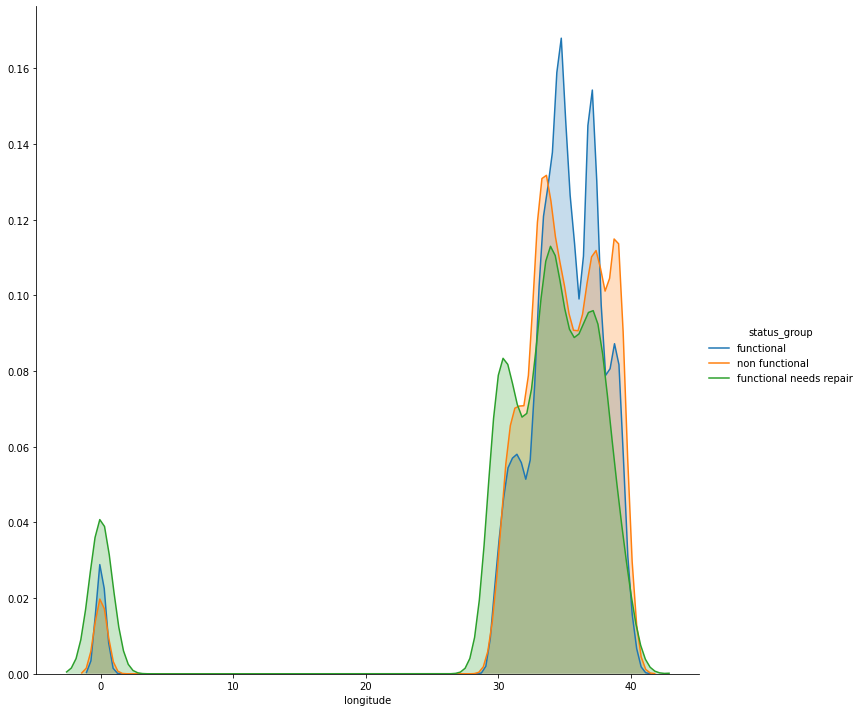

In [75]:
(sns
  .FacetGrid(data, 
             hue='status_group',size=10)
  .map(sns.kdeplot, 'longitude', shade=True)
 .add_legend()
)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


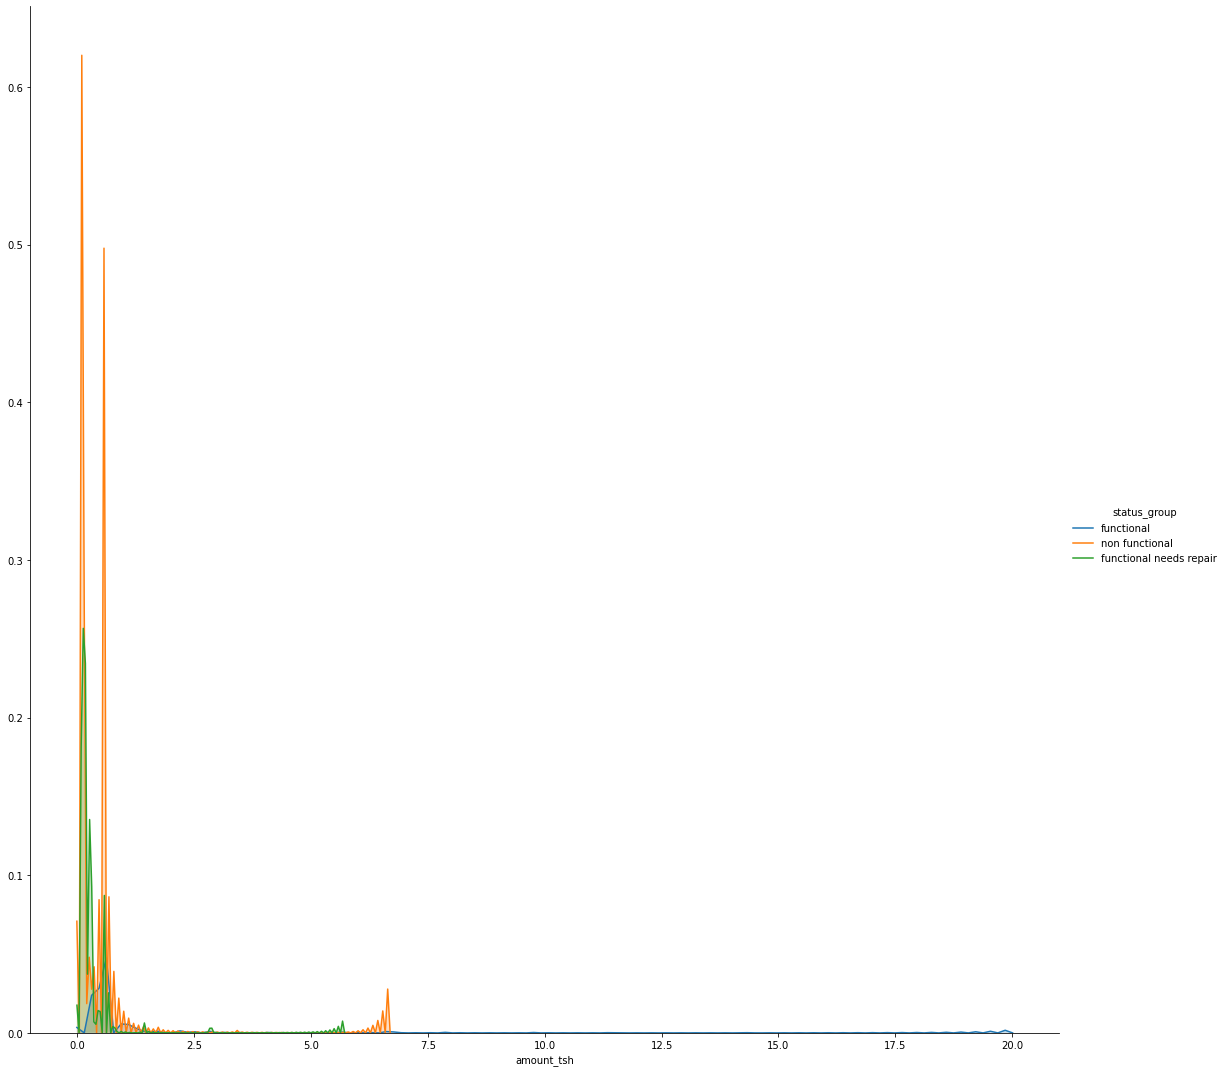

In [76]:
(sns
  .FacetGrid(data, 
             hue='status_group',size=15)
  .map(sns.kdeplot, 'amount_tsh', shade=True)
 .add_legend()
)

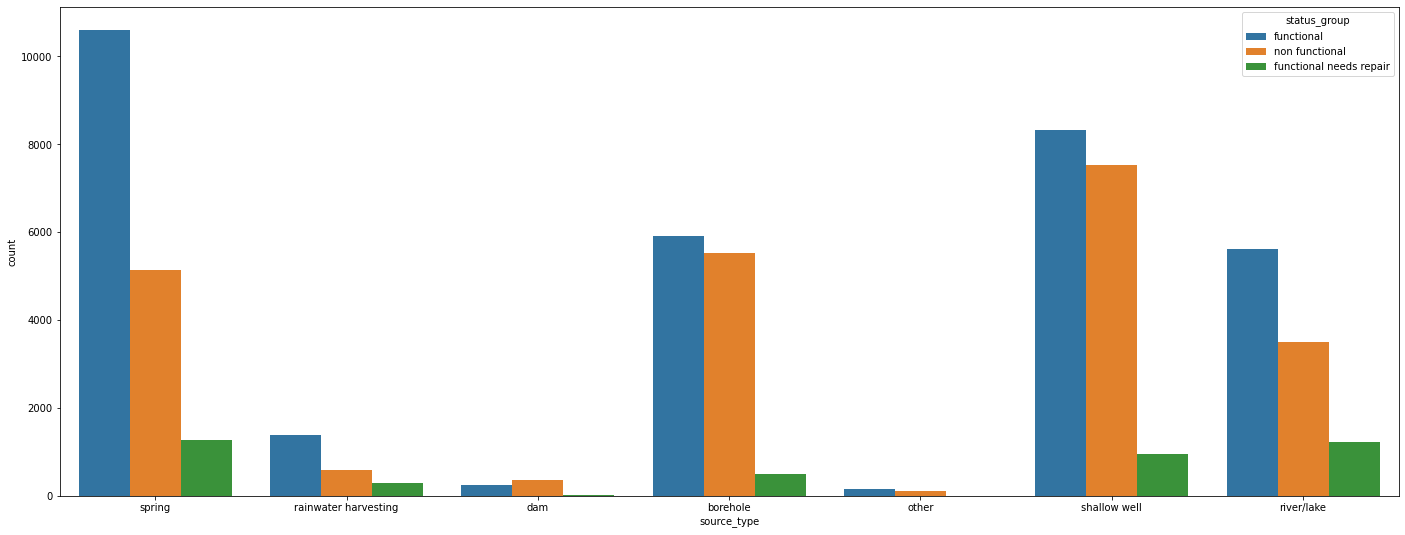

In [77]:
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='source_type',hue='status_group')

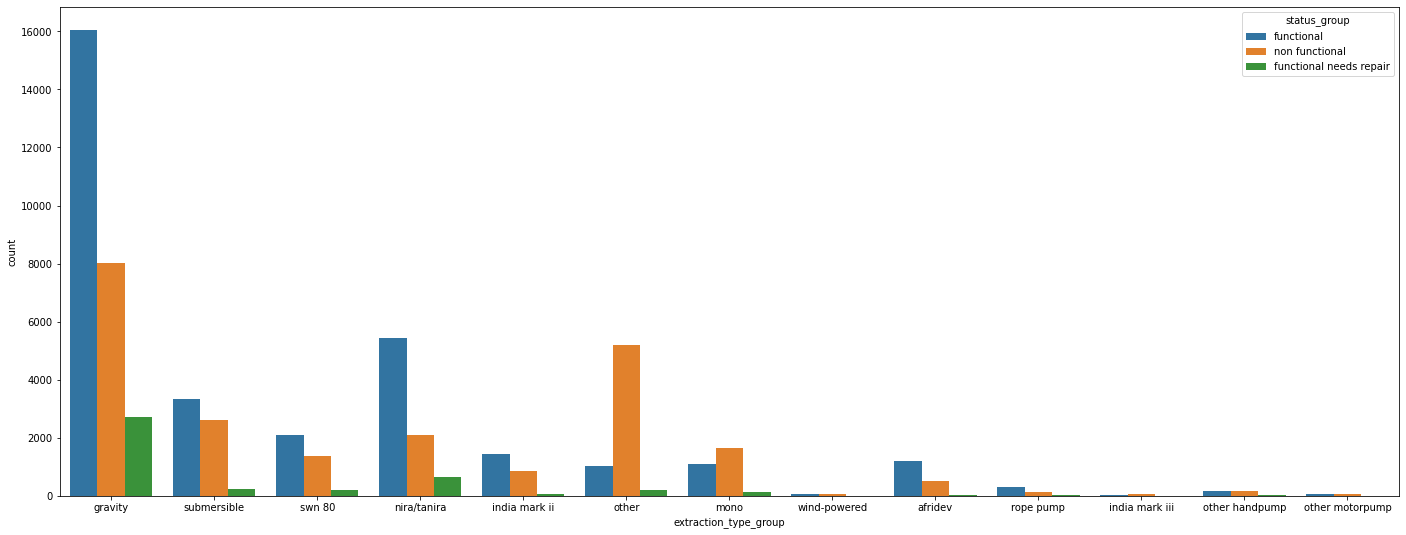

In [78]:
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='extraction_type_group',hue='status_group')

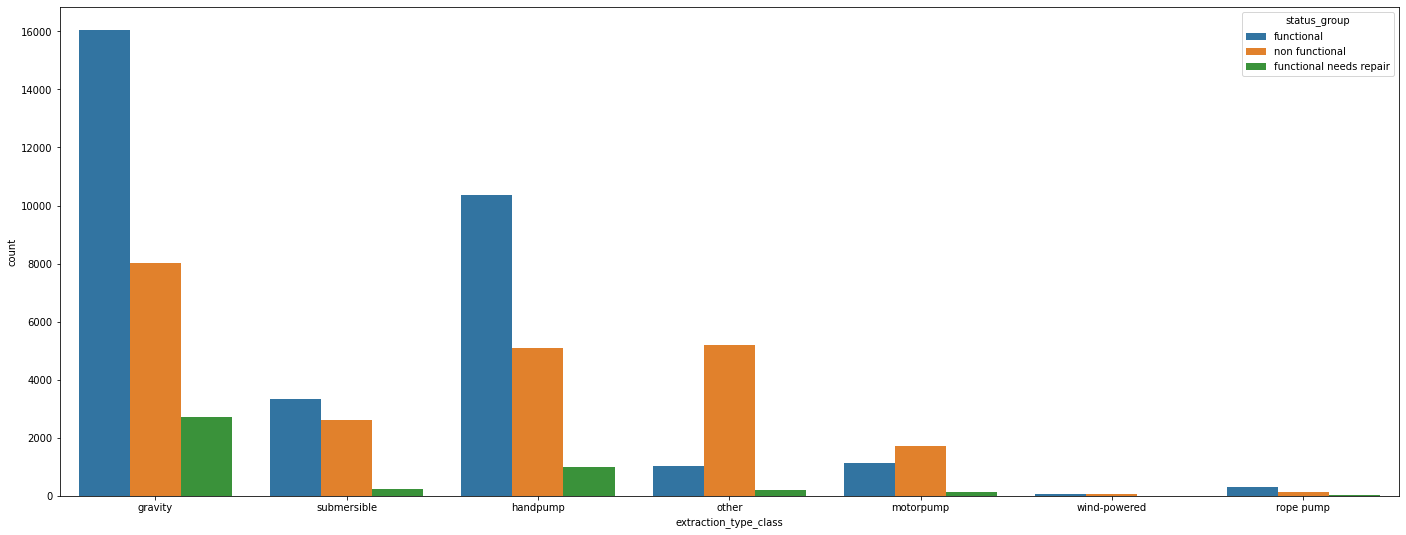

In [79]:
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='extraction_type_class',hue='status_group')

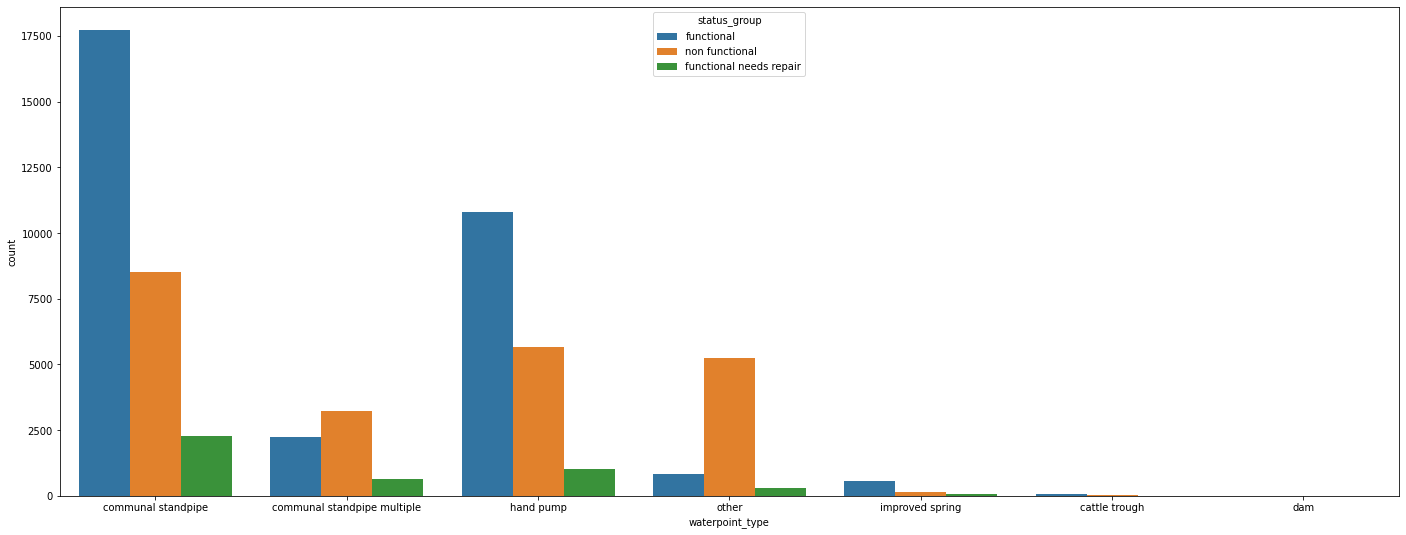

In [80]:
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='waterpoint_type',hue='status_group')

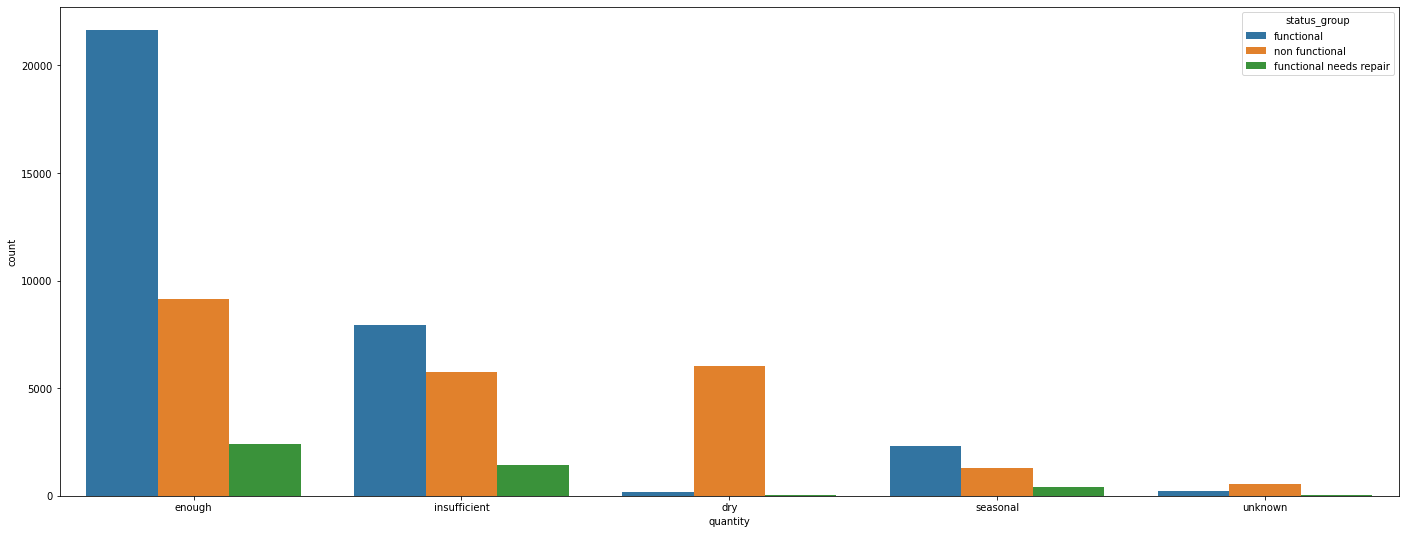

In [81]:
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='quantity',hue='status_group')

In [82]:
data['longitude'].replace(0.0, np.nan, inplace=True)
data['latitude'].replace(0.0, np.nan, inplace=True)
data['construction_year'].replace(0.0, np.nan, inplace=True)

In [83]:
data.groupby(['district_code', 'region','construction_year']).size() 

district_code  region     construction_year
0              Dodoma     0                     23
1              Arusha     0                      3
                          1980                   2
                          1990                  23
                          2000                 137
                                              ... 
63             Mtwara     2011                   2
                          2012                   8
               Pwani      0                     37
67             Pwani      0                      6
80             Shinyanga  0                     12
Length: 2374, dtype: int64

In [84]:
data["latitude"].fillna(data.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
data["longitude"].fillna(data.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
data["longitude"].fillna(data.groupby(['region'])["longitude"].transform("mean"), inplace=True)
data["construction_year"].fillna(data.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['region'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data["construction_year"].median(), inplace=True)
print(data.isnull().sum())

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [85]:
#if water point is old, it is highly likely to be non functional or needs repair.
#New features were created namely number of days and number of months water point is operational.
print(data.date_recorded.head(5))
print(data.construction_year.head(5))


0    2011-03-14
1    2013-03-06
2    2013-02-25
3    2013-01-28
4    2011-07-13
Name: date_recorded, dtype: object
0    1999
1    2010
2    2009
3    1986
4       0
Name: construction_year, dtype: int64


In [86]:
data.isnull().sum()
data['date_recorded'] = pd.to_datetime(data['date_recorded'])
data.date_recorded.head(5)
print(data.date_recorded.dt.year.head(5))
print(data.construction_year.head(5))
data['operational_year'] = data.date_recorded.dt.year - data.construction_year
data.operational_year.head(5)

0    2011
1    2013
2    2013
3    2013
4    2011
Name: date_recorded, dtype: int64
0    1999
1    2010
2    2009
3    1986
4       0
Name: construction_year, dtype: int64


0      12
1       3
2       4
3      27
4    2011
Name: operational_year, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


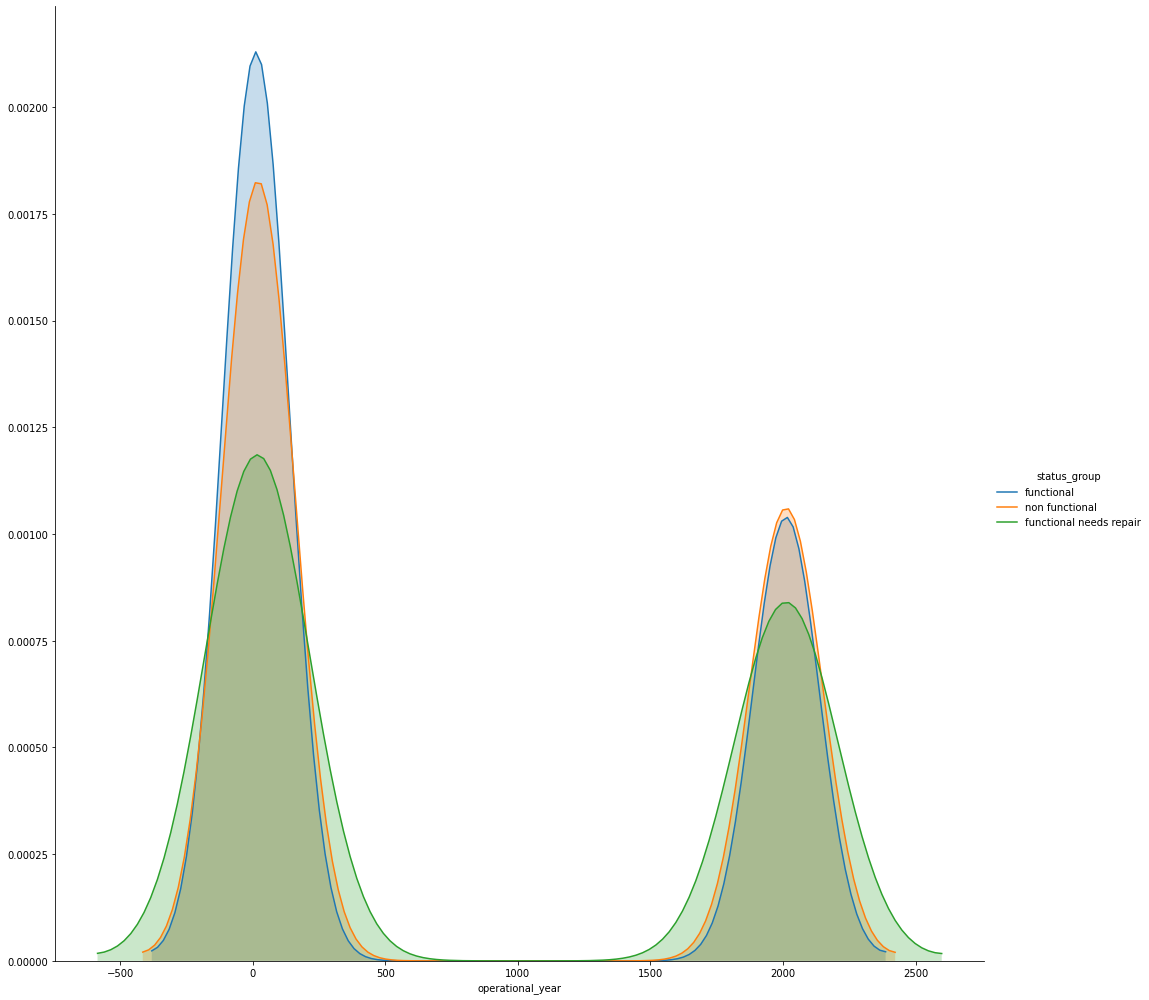

In [87]:
(sns
  .FacetGrid(data, 
             hue='status_group',size=14)
  .map(sns.kdeplot, 'operational_year', shade=True)
 .add_legend()
)

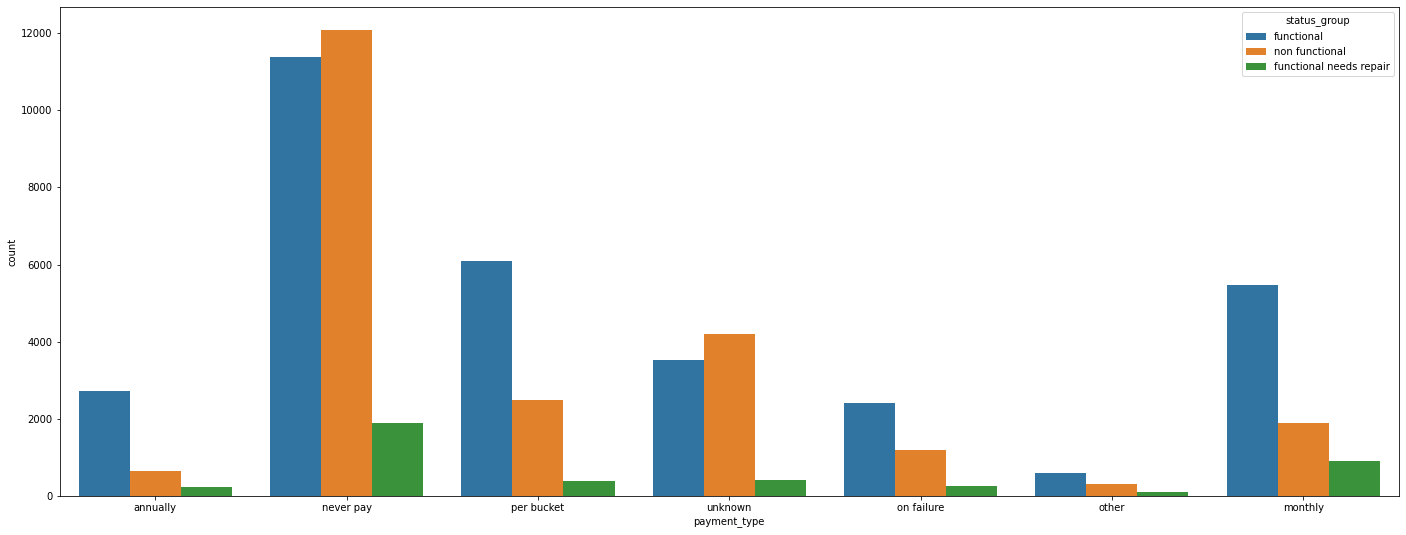

In [88]:
plt.figure(figsize=(24, 9))
sns.countplot(data=data,x='payment_type',hue='status_group')

In [89]:
#DATA Cleaning
waste_features=['wpt_name','num_private','subvillage','region_code','recorded_by']
#since region and region_code are representing the same thing
data.drop(waste_features,axis=1,inplace=True)
print(data.groupby(['management', 'management_group']).size() )
data.drop('management_group',axis=1,inplace=True)

management        management_group
company           commercial            685
other             other                 844
other - school    other                  99
parastatal        parastatal           1768
private operator  commercial           1971
trust             commercial             78
unknown           unknown               561
vwc               user-group          40507
water authority   commercial            904
water board       user-group           2933
wua               user-group           2535
wug               user-group           6515
dtype: int64


In [90]:
print(data.groupby(['extraction_type_group','extraction_type_class','extraction_type']).size()   )   
data.drop('extraction_type_group',axis=1,inplace=True)

extraction_type_group  extraction_type_class  extraction_type          
afridev                handpump               afridev                       1770
gravity                gravity                gravity                      26780
india mark ii          handpump               india mark ii                 2400
india mark iii         handpump               india mark iii                  98
mono                   motorpump              mono                          2865
nira/tanira            handpump               nira/tanira                   8154
other                  other                  other                         6430
other handpump         handpump               other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
other motorpump        motorpump     

In [91]:
data.drop('extraction_type_class',axis=1,inplace=True)

In [92]:
data.groupby(['scheme_management', 'scheme_name']).size() 

scheme_management  scheme_name              
Company            BFFS                           1
                   Bagamoyo Wate                 60
                   Bagamoyo wate                210
                   Borehole                       1
                   Borehole drilling project      1
                                               ... 
Water authority    Yongoma                       16
                   Zepalama                       5
                   no scheme                      9
                   pump                           2
                   water supply at Kalebejo       1
Length: 3077, dtype: int64

In [93]:
data.drop('scheme_name',axis=1,inplace=True)

In [94]:
data.groupby(['payment', 'payment_type']).size() 

payment                payment_type
never pay              never pay       25348
other                  other            1054
pay annually           annually         3642
pay monthly            monthly          8300
pay per bucket         per bucket       8985
pay when scheme fails  on failure       3914
unknown                unknown          8157
dtype: int64

In [95]:
data.drop('payment',axis=1,inplace=True)

In [96]:
data.groupby(['water_quality', 'quality_group']).size() 

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

In [97]:
data.drop('quality_group',axis=1,inplace=True)

In [98]:
data.groupby(['quantity', 'quantity_group']).size() 

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

In [99]:
data.drop('quantity_group',axis=1,inplace=True)

In [100]:
data.groupby(['source', 'source_type', 'source_class']).size() 

source                source_type           source_class
dam                   dam                   surface           656
hand dtw              borehole              groundwater       874
lake                  river/lake            surface           765
machine dbh           borehole              groundwater     11075
other                 other                 unknown           212
rainwater harvesting  rainwater harvesting  surface          2295
river                 river/lake            surface          9612
shallow well          shallow well          groundwater     16824
spring                spring                groundwater     17021
unknown               other                 unknown            66
dtype: int64

In [101]:
data.drop('source_type',axis=1,inplace=True)

In [102]:
data.drop('source_class',axis=1,inplace=True)

In [103]:
data.groupby(['waterpoint_type', 'waterpoint_type_group']).size() 

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              116
communal standpipe           communal standpipe       28522
communal standpipe multiple  communal standpipe        6103
dam                          dam                          7
hand pump                    hand pump                17488
improved spring              improved spring            784
other                        other                     6380
dtype: int64

In [104]:
data.drop('waterpoint_type_group',axis=1,inplace=True)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 59400 non-null  int64         
 1   status_group       59400 non-null  object        
 2   amount_tsh         59400 non-null  float64       
 3   date_recorded      59400 non-null  datetime64[ns]
 4   funder             55765 non-null  object        
 5   gps_height         59400 non-null  float64       
 6   installer          55745 non-null  object        
 7   longitude          59400 non-null  float64       
 8   latitude           59400 non-null  float64       
 9   basin              59400 non-null  object        
 10  region             59400 non-null  object        
 11  district_code      59400 non-null  int64         
 12  lga                59400 non-null  object        
 13  ward               59400 non-null  object        
 14  popula

In [106]:
print(data.groupby(['lga', 'ward','status_group']).size() )
#print(data.groupby(['lga', 'ward']).size() )

lga           ward     status_group           
Arusha Rural  Bangata  functional                 21
                       functional needs repair     2
                       non functional             10
              Bwawani  functional                 12
                       non functional             25
                                                  ..
Uyui          Ufuluma  non functional             10
              Upuge    functional                  7
                       non functional             11
              Usagali  functional                  8
                       non functional             17
Length: 5070, dtype: int64


In [107]:
data.drop('ward',axis=1,inplace=True)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 59400 non-null  int64         
 1   status_group       59400 non-null  object        
 2   amount_tsh         59400 non-null  float64       
 3   date_recorded      59400 non-null  datetime64[ns]
 4   funder             55765 non-null  object        
 5   gps_height         59400 non-null  float64       
 6   installer          55745 non-null  object        
 7   longitude          59400 non-null  float64       
 8   latitude           59400 non-null  float64       
 9   basin              59400 non-null  object        
 10  region             59400 non-null  object        
 11  district_code      59400 non-null  int64         
 12  lga                59400 non-null  object        
 13  population         59400 non-null  float64       
 14  public

In [109]:
data.groupby(['installer', 'funder','status_group']).size() 

installer       funder                  status_group           
-               Government Of Tanzania  functional                   1
                                        non functional               1
                Kalebejo Parish         functional                   1
0               0                       functional                 445
                                        functional needs repair      3
                                                                  ... 
wizara ya maji  Serikali                functional                   2
world           World Bank              functional needs repair      1
                                        non functional               3
world banks     World Bank              non functional               1
world vision    World Vision            functional                   1
Length: 5188, dtype: int64

In [110]:
# data.drop('installer',axis=1,inplace=True)


In [111]:
data.isnull().sum()

id                      0
status_group            0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude               0
latitude                0
basin                   0
region                  0
district_code           0
lga                     0
population              0
public_meeting       3334
scheme_management    3877
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
operational_year        0
dtype: int64

In [112]:
#data.drop('public_meeting', axis=1, inplace=True)
#data.drop('permit', axis=1, inplace=True)

In [113]:
data.isnull().sum()

id                      0
status_group            0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude               0
latitude                0
basin                   0
region                  0
district_code           0
lga                     0
population              0
public_meeting       3334
scheme_management    3877
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
operational_year        0
dtype: int64

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 59400 non-null  int64         
 1   status_group       59400 non-null  object        
 2   amount_tsh         59400 non-null  float64       
 3   date_recorded      59400 non-null  datetime64[ns]
 4   funder             55765 non-null  object        
 5   gps_height         59400 non-null  float64       
 6   installer          55745 non-null  object        
 7   longitude          59400 non-null  float64       
 8   latitude           59400 non-null  float64       
 9   basin              59400 non-null  object        
 10  region             59400 non-null  object        
 11  district_code      59400 non-null  int64         
 12  lga                59400 non-null  object        
 13  population         59400 non-null  float64       
 14  public

In [115]:
#For every categorical response, convert the levels to lower case, in case there is random capitalization
data.waterpoint_type = data.waterpoint_type.str.lower()
data.funder = data.funder.str.lower()
data.basin = data.basin.str.lower()
data.region = data.region.str.lower()
data.source = data.source.str.lower()
data.lga = data.lga.str.lower()
data.management = data.management.str.lower()
data.quantity = data.quantity.str.lower()
data.water_quality = data.water_quality.str.lower()
data.payment_type=data.payment_type.str.lower()
data.extraction_type=data.extraction_type.str.lower()

In [116]:
data.head(5)
data["funder"].fillna("other", inplace=True)
data["scheme_management"].fillna("other", inplace=True)
data["installer"].fillna("other", inplace=True)
print(data.isnull().sum())
data.drop('date_recorded', axis=1, inplace=True)
data.drop('construction_year', axis=1, inplace=True)
data.info()
data.quantity.head(5)
pd.DataFrame(data).to_csv("/content/sample_data/clean.csv")

id                      0
status_group            0
amount_tsh              0
date_recorded           0
funder                  0
gps_height              0
installer               0
longitude               0
latitude                0
basin                   0
region                  0
district_code           0
lga                     0
population              0
public_meeting       3334
scheme_management       0
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
operational_year        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   status_group       59400 non-null  object 
 2   amoun